In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [46]:
df = pd.read_csv(r'~\Box\STAT 222 Capstone\Raw Data\Earnings call from web\earning_call_web.csv')

In [47]:
print(df.shape)
print(df.columns)
df["date"] = pd.to_datetime(df["date"])

(18346, 6)
Index(['Unnamed: 0', 'symbol', 'quarter', 'year', 'date', 'content'], dtype='object')


In [48]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,symbol,quarter,year,date,content
0,BCE,4,2012,2013-02-07 17:00:00,Thane Fotopoulos: Good morning everybody. I am...
1,BCE,3,2012,2012-11-01 13:00:49,Executives: Thane Fotopoulos George Alexander ...
2,BCE,2,2012,2012-08-08 15:00:00,Executives: Thane Fotopoulos George A. Cope - ...
3,BCE,4,2013,2014-02-06 17:30:09,Executives: Thane Fotopoulos George Alexander ...
4,BCE,3,2013,2013-11-07 15:00:00,Executives: Thane Fotopoulos George Alexander ...


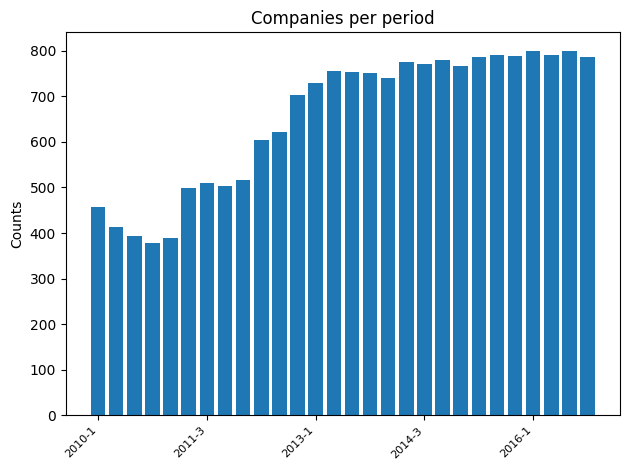

In [8]:
company_by_date = []
group_yq = df.groupby(["year", "quarter"])["symbol"].nunique().reset_index()
group_yq["period"] = group_yq['year'].astype(str) + "-" + group_yq['quarter'].astype(str)
n = 6


plt.bar(group_yq['period'].tolist(), group_yq['symbol'].tolist())
plt.title("Companies per period")
plt.ylabel('Counts')
plt.xticks([i for i in range(len(group_yq["period"])) if i % n == 0], 
           [label for i, label in enumerate(group_yq["period"]) if i % n == 0],
           rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [14]:
df.symbol.value_counts(ascending= True).head(15)

symbol
SITE    1
GWRS    1
ADSW    1
DFIN    1
FTV     1
CCU     1
PED     1
INSW    1
HZN     2
TGLS    2
INFO    2
BW      3
WBT     3
GLPG    3
EPC     3
Name: count, dtype: int64

### Date Verification

In [14]:
df.sort_values(by = "date").head()

,Unnamed: 0,symbol,quarter,year,date,content
10396,10396,NVDA,1,2010,2009-05-08 01:50:29,Executives: Michael Hara - Investor Relations ...
16593,16593,ADSK,1,2010,2009-05-21 20:48:16,Executives: David Gennarelli - Director of Inv...
13651,13651,LDOS,1,2010,2009-06-03 20:43:37,Executives: Stuart Davis - Senior Vice Preside...
15357,15357,SCS,1,2010,2009-06-23 15:11:40,Executives: Raj Mehan - Director IR Jim Hacke...
7085,7085,RAD,1,2010,2009-06-24 14:47:21,Executives: Chris Hall - Senior Vice President...


### Good Cases

In [26]:
# Good
# Company: NVDA
# Year & quarter: 2010 1
# Actual quarter: 2010 1
# Date: 2009-05-08
# Actual Date: 2009-05-08 (checked with transcripts)
print(df.iloc[10396, -1])

Executives: Michael Hara - Investor Relations Jen-Hsun Huang - President, Chief Executive Officer and Director David White - Chief Financial Officer  Marvin D. Burkett - Senior Advisor
Analysts: Daniel Berenbaum - Auriga Hans Mosesmann - Raymond James Glen Yeung - Citigroup  Uche Orji - UBS  Rajvindra Gill - Needham & Company Patrick Newton - Stifel Nicolaus  Alex Gana - GMP Securities Jim Schneider - Goldman Sachs Craig Berger - Friedman, Billings, Ramsay Shawn Webster - J.P. Morgan David Wu - Global Crown Capital  Suji DeSilva - Kaufman Brothers 
Operator: Good afternoon, ladies and gentlemen. Thank you for holding. I would now like to turn the call over to Michael Hara, Vice President, Investor Relations. Thank you, sir. You may begin. 
Michael Hara: Thank you, Shannon. Good afternoon and welcome to NVIDIA's conference call for the first quarter of fiscal 2010 ended April 26, 2009. Today’s call is being recorded. If you have any objections, please disconnect at this time. On the cal

In [ ]:
# Good
# Company: LDOS
# Year & quarter: 2015 3
# Actual quarter: 2015 3
# Date: 2014-12-03
# Actual Date: 2014-12-03 (checked on web)
print(df.iloc[13666, -1])

### minor mismatch in date and quarter

In [51]:
# eg. Year 2015 (transcript still match with quarter)
print(df[df.symbol == "LDOS"].sort_values(by="date"))

       Unnamed: 0 symbol  quarter  year                date  \
13651       13651   LDOS        1  2010 2009-06-03 20:43:37   
13650       13650   LDOS        2  2010 2009-09-02 22:13:24   
13649       13649   LDOS        3  2010 2009-12-09 00:17:07   
13648       13648   LDOS        4  2010 2010-03-30 21:52:10   
13653       13653   LDOS        1  2011 2010-06-05 04:24:08   
13652       13652   LDOS        3  2011 2010-12-08 22:58:20   
13657       13657   LDOS        1  2012 2011-06-02 21:50:16   
13656       13656   LDOS        2  2012 2011-08-31 21:00:08   
13655       13655   LDOS        3  2012 2011-12-06 21:10:09   
13654       13654   LDOS        4  2012 2012-03-20 20:40:35   
13661       13661   LDOS        1  2013 2012-05-31 20:40:03   
13660       13660   LDOS        2  2013 2012-08-30 22:30:05   
13659       13659   LDOS        3  2013 2012-12-05 21:10:03   
13658       13658   LDOS        4  2013 2013-03-26 19:50:03   
13663       13663   LDOS        1  2014 2013-06-03 22:0

In [50]:
# Bad
# Company: LDOS
# Year & quarter: 2015 1
# Actual quarter: 2015 1
# Date: 2015-05-12
# Actual Date: 2014-06-04 (checked on web)
print(df.iloc[13664, -1])

Executives: Kelly P. Hernandez - Vice President, Investor Relations Roger A. Krone - Chief Executive Officer Mark W. Sopp - Chief Financial Officer & Executive Vice President Lou Von Thaer - President, National Security Sector, Leidos Holdings, Inc.
Analysts: Cai von Rumohr - Cowen & Co. LLC Edward S. Caso - Wells Fargo Securities LLC Jonathan Raviv - Citigroup Global Markets, Inc. (Broker) Bill R. Loomis - Stifel, Nicolaus & Co., Inc. Michael Kendrick French - Drexel Hamilton LLC Amit Singh - Jefferies LLC
Operator: Good day, ladies and gentlemen, and welcome to Leidos' First Quarter 2015 Earnings Conference Call. At this time, all participants are in a listen-only mode. Later, we'll conduct a question-and-answer session and instructions will be given at that time. As a reminder, this conference call maybe recorded. At this time, I would like to hand the conference over to Ms. Kelly Hernandez, Vice President of Investor Relations. Ma'am, you may begin.
Kelly P. Hernandez - Vice Presid

### Discrepancy in Year & Quarter

In [15]:
df.describe()

,Unnamed: 0,quarter,year,date
count,18346.000000,18346.000000,18346.000000,18346
mean,9172.500000,2.523874,2013.418947,2014-01-20 02:04:28.998201344
min,0.000000,1.000000,2010.000000,2009-05-08 01:50:29
25%,4586.250000,2.000000,2012.000000,2012-07-31 16:35:32.249999872
50%,9172.500000,3.000000,2014.000000,2014-03-02 14:40:03
75%,13758.750000,4.000000,2015.000000,2015-08-09 00:36:58.500000
max,18345.000000,4.000000,2016.000000,2017-05-23 22:23:05
std,5296.178355,1.113657,1.893340,NaN


In [16]:
def match_date(year, quarter):
    # Assign 1st quarter to Feb, 2nd to May, 3rd to Aug, 4th to Nov
    month = (quarter-1)*3 + 2
    matched_date = f"{year}-{month:02d}-01"
    return matched_date

matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation = df.date - matched_date
deviation.describe()

count                         18346
mean     62 days 08:19:07.315000545
std      75 days 12:32:31.718200896
min             -274 days +21:19:00
25%         80 days 13:31:37.500000
50%                88 days 21:30:37
75%         96 days 13:50:10.500000
max               453 days 17:00:00
dtype: object

In [57]:
df[deviation>timedelta(days=360)]

,Unnamed: 0,symbol,quarter,year,date,content
4832,4832,JCI,2,2011,2012-04-26 15:27:03,Executives: Ed Breen - Chairman & Chief Execut...
13928,13928,MANT,1,2014,2015-04-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
15470,15470,SGMS,1,2016,2017-04-28 17:00:00,Operator: Good day everyone and welcome to the...


In [41]:
# Company: MANT
# Year & quarter: 2014 1
# Actual quarter: 2015 1 (checked in transcritpt)
# Date: 2015-04-30
# Actual Date: 2015-04-30 (checked on web)
print(df.iloc[13928, -1])

Operator: Good day, ladies and gentlemen and welcome to the ManTech International Corp. First Quarter Fiscal Year 2015 Conference Call. At this time all participants are in a listen-only mode. Later, we will conduct a question-and-answer session, and instructions will follow at that time. [Operator Instructions]As a reminder, this conference is being recorded. I would now like to introduce your host for today’s conference Stuart Davis, Executive Vice President for Strategy. Sir, you may begin.
Stuart Davis: Thank you, Amanda, and welcome, everyone. On today's call, we have George Pedersen, Chairman and CEO; Kevin Phillips, Executive Vice President and CFO; and Bill Varner and Dan Keefe, our two Group Presidents. During this call, we will make statements that do not address historical facts and thus are forward-looking statements made pursuant to the Safe Harbor provisions of the Private Securities Litigation Reform Act of 1995.These forward-looking statements are subject to factors tha

In [47]:
# discrepancy in year
display(df.iloc[13926:13939, ].sort_values(by = "date"))

,Unnamed: 0,symbol,quarter,year,date,content
13927,13927,MANT,1,2013,2013-05-02 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13926,13926,MANT,2,2013,2013-08-01 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13931,13931,MANT,2,2014,2014-07-31 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13930,13930,MANT,3,2014,2014-10-30 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13929,13929,MANT,4,2014,2015-02-19 17:00:00,"Operator: Good day, ladies and gentlemen. And ..."
13928,13928,MANT,1,2014,2015-04-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
13934,13934,MANT,2,2015,2015-07-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
13933,13933,MANT,3,2015,2015-10-29 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13932,13932,MANT,4,2015,2016-02-18 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13938,13938,MANT,1,2016,2016-04-28 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."


In [48]:
# Company: JCI
# Year & quarter: 2011 2
# Actual quarter: 2012 2
# Date: 2012-04-26
# Actual Date: 2012-04-20 (checked on Web)
print(df.iloc[4832, -1])

Executives: Ed Breen - Chairman & Chief Executive Officer  Frank Sklarsky - Chief Financial Officer  Patrick Decker - President of Flow Control Naren Gursahaney - President of Tyco Security Solutions George Oliver - President of Tyco Fire Protection Antonella Franzen - Vice President of Investor Relations
Analysts:
Jeff Sprague - Vertical Research:
Scott Davis - Barclays: Steven Winoker - Sanford Bernstein
Ajay Kejriwal - FBR Capital Markets:
Gautam Khanna - Cowen:
Steve Tusa - JPMorgan:
Nigel Coe - Morgan Stanley : Deane Dray - Citi Operator Welcome to the Tyco second quarter earnings conference call. At this time all lines have been placed on a listen-only mode until the question-and-answer session. (Operator Instructions).  I’d now like to turn the call over to Antonella Franzen, Vice President of Investor Relations. Thank you. You may begin. 
Antonella Franzen:  Good morning and thank you for joining our conference call to discuss Tyco’s second quarter results for fiscal year 2012 

In [52]:
# Company: SGMS
# Year & quarter: 2016 1
# Actual quarter: 2017 1
# Date: 2017-04-28
# Actual Date: 2017-04-27
print(df.iloc[15470, -1])

Operator: Good day everyone and welcome to the Scientific Games First Quarter 2017 Investor Conference Call. All participants will be in a listen-only mode. [Operator Instructions] After today's presentation, there will be an opportunity to ask questions. [Operator Instructions] Please also note, that today's event is being recorded. At this time, I would like to turn the conference call over to Bill Pfund, Head of Investor Relations. Sir, please go ahead.
Bill Pfund: Thank you, Jamie. Good afternoon, everyone. During today's call, we will discuss our 2017 first quarter results and operating performance, followed by a question and answer period. With me this afternoon are Kevin Sheehan, Chief Executive Officer; KJ Tjon, Chief Operating Officer and Mike Quartieri, Chief Financial Officer. Our call today will contain statements that include forward-looking statements under the Private Securities Litigation Reform Act of 1995. These statements involve certain risks and uncertainties that 

### Old data

In [49]:
# Load the data
df_old = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Calls\calls_short.csv')
df_old.rename(columns={"transcript":"content", "company": "symbol"}, inplace = True)
df_old = df_old.drop("sector", axis = 1)

In [24]:
df_old["Source"] = "kaggle"
df["Source"] = "web"
print(df_old.columns)
print(df.columns)

Index(['symbol', 'year', 'quarter', 'date', 'content', 'Source'], dtype='object')
Index(['symbol', 'year', 'quarter', 'date', 'content', 'Source'], dtype='object')


In [25]:
df = df[df_old.columns]
df_full = pd.concat([df_old, df], axis = 0)

In [26]:
print(df_old.shape)
print(df.shape)
print(df_full.shape)

(24580, 6)
(18346, 6)
(42926, 6)


In [75]:
df_full.symbol.nunique()

1725

In [27]:
df_full.duplicated(subset=['symbol', 'year', 'quarter']).sum()

9987

In [30]:
df_full.drop_duplicates(subset = ['symbol', 'year', 'quarter'], keep = "last", inplace = True)

In [31]:
df_full.shape

(32939, 6)

In [38]:
# 18 companies has less than 2 earnings calls in the data
print((df_full.symbol.value_counts(ascending=True)<2).sum())

# 1725 unique companies
print(df_full.symbol.nunique())

18
1725


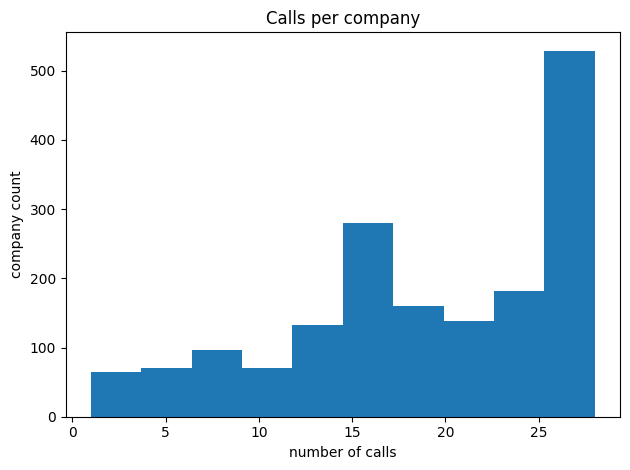

In [42]:
plt.hist(df_full.symbol.value_counts())
plt.title("Calls per company")
plt.ylabel('company count')
plt.xlabel("number of calls")
plt.tight_layout()
plt.show()

## Distribution of mismatch in date

In [75]:
def match_date(year, quarter):
    # Assign 1st quarter to Jan, 2nd to Apr, 3rd to July, 4th to Oct
    month = (quarter-1)*3 + 1
    matched_date = f"{year}-{month:02d}-01"
    matched_date = pd.to_datetime(matched_date)
    return matched_date

# New calls from web
matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
deviation_web = df.date - matched_date
deviation_web.describe()

count                         18346
mean     93 days 02:16:15.419219448
std      75 days 12:45:11.610805412
min             -243 days +21:19:00
25%        110 days 23:10:31.250000
50%               119 days 17:00:00
75%        126 days 21:59:46.250000
max               484 days 17:00:00
dtype: object

In [76]:
# Old calls from kaggle
matched_date = df_old.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation_old = pd.to_datetime(df_old.date) - matched_date
deviation_old.describe()

count                           24580
mean     -67 days +04:11:30.122050448
std       285 days 15:53:18.835013400
min              -3047 days +00:00:00
25%                -68 days +00:00:00
50%                  26 days 00:00:00
75%                  47 days 00:00:00
max                 225 days 00:00:00
dtype: object

In [77]:
pd.to_datetime("2020-01-01") - pd.to_datetime("2020-04-01")

Timedelta('-91 days +00:00:00')

In [78]:
deviation_web.dt.days.head()

0    129
1    123
2    129
3    128
4    129
dtype: int64

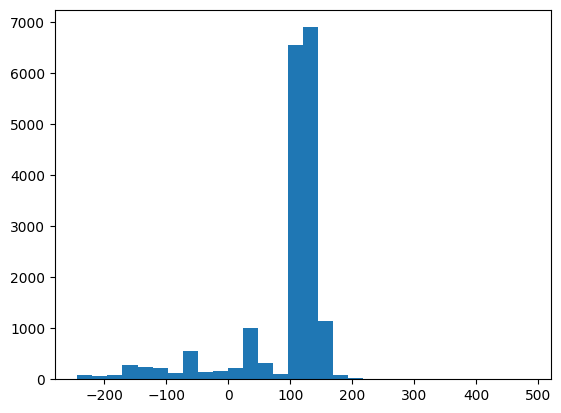

In [85]:
# positive means days after Jan-01 for earnings calls
plt.hist(deviation_web.dt.days, bins = 30);

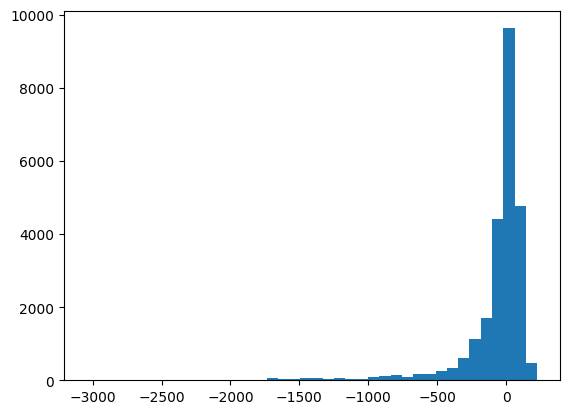

In [97]:
plt.hist(deviation_old.dt.days, bins = 40);

In [86]:
df_old.iloc[2131, -1]

"Operator: Good day, ladies and gentlemen, and welcome to the Zions Bancorporation Fourth Quarter Earnings Call. [Operator Instructions] I would now like to turn the conference over to your host, James Abbott.\nJames Abbott: Thanks, John, and good evening. We welcome you to this conference call to discuss our fourth quarter 2010 earnings results. I would like to remind you that during this call, we will be making forward-looking statements and that actual results may differ materially. We encourage you to review the disclaimer in the press release dealing with forward-looking information, which applies equally to statements made in this call. We will be referring to several schedules in the press release during this call. And if you do not yet have a copy of the press release, it is available as an Adobe Acrobat file at zionsbancorporation.com. We will limit the length of this call to one hour, which will include time for you to ask questions. During the Q&A section, we ask you to limi

In [92]:
df_old.iloc[23878, -1]

"Operator: Good day, ladies and gentlemen. Thank you for standing by. Welcome to Best Buy's Conference Call for the Fourth Quarter of Fiscal 2011. [Operator Instructions] I would now like to turn the conference call over to Mr. Bill Seymour, Vice President of Investor Relations. Please go ahead, sir.\nBill Seymour: Thank you, Alicia. Good morning, everyone. Thank you for participating in our fiscal 2011 fourth quarter and full year earnings conference call. We have three speakers for you today: Brian Dunn, our CEO; Mike Vitelli, our Co-President of the Americas; and Jim Muehlbauer, our CFO. And after our prepared remarks, I anticipate we will have plenty of time for your questions. Before I pass the call over to Brian, I'd like to take care of a few housekeeping items. First, we would like to request that callers limit themselves to a single question so that we can include more people in our Q&A session. And as usual, the media are participating in this call in a listen-only mode. Let 

In [87]:
df.iloc[3218, -1]

"Executives: Lynne Maxeiner - Director of IR David Farr - Chairman of the Board, Chief Executive Officer, President and Chairman of Executive Committee\nAnalysts: Richard Kwas - Wells Fargo Securities, LLC Scott Davis - Morgan Stanley John Inch - BofA Merrill Lynch Terry Darling - Goldman Sachs Group Inc. Eli Lustgarten - Longbow Research LLC Steven Winoker - Bernstein Research C. Stephen Tusa - JP Morgan Chase & Co Robert Cornell - Barclays Capital Julian Mitchell Nigel Coe - Deutsche Bank AG Christopher Glynn - Oppenheimer & Co. Inc.\nOperator: Good day, ladies and gentlemen. Thank you for standing by. Welcome to the Emerson Third Quarter Fiscal 2010 Results Conference Call. [Operator Instructions] Emerson's commentary and responses to your questions may contain forward-looking statements, including the company's outlook for the remainder of the year. Information on factors that could cause actual results to vary materially from those discussed today is available at Emerson's most re

In [88]:
df.iloc[3847, -1]

'Executives: Matt Cribbins – Vice President-Investor Communications Jeff Immelt – Chairman and Chief Executive Officer Keith Sherin – Vice Chairman and Chief Executive Officer-GE Capital Jeff Bornstein – Chief Financial Officer\nAnalysts: Scott Davis – Barclays Deane Dray – RBC Capital Markets Steven Winoker – Bernstein Nigel Coe – Morgan Stanley Shannon OCallaghan – UBS Julian Mitchell – Credit Suisse Joe Ritchie – Goldman Sachs Christopher Glynn – Oppenheimer Robert McCarthy – Stifel Jeffrey Sprague – Vertical Research\nOperator: Good day, ladies and gentlemen, and welcome to the General Electric Third Quarter 2015 Earnings Conference Call. At this time, all participants are in a listen-only mode. My name is Ellen and I will be your conference coordinator today. [Operator Instructions] As a reminder, this conference is being recorded. I would now like turn the program over to your host for today’s conference, Matt Cribbins, Vice President of Investor Communications. Please proceed.\n

In [91]:
df.iloc[4857, -1]

'Executives: Louise Mehrotra – Vice President, Investor Relations Sheri McCoy - Worldwide Chairman, Pharmaceuticals Group Dominic Caruso – Vice President, Finance and Chief Financial Officer\nAnalysts: Christine [No other identification.] Michael Weinstein – JP Morgan Chase & Co. Sara Michelmore - Cowen & Co. Rick Wise - Leerink Swann Matt Dodds – Citigroup Jami Rubin – Goldman Sachs Derrick Sung – Sanford Bernstein Bob Hopkins – Bank of America Bruce Nudell – UBS Matt Miksic – Piper Jaffray Larry Biegelsen – Wells Fargo Glenn Novarro – RBC Capital Eddie Han-Burgess - Raymond James  \nLouise Mehrotra: Good morning and welcome. I\'m Louise Mehrotra, vice president of investor relations for Johnson & Johnson, and it is my pleasure this morning to review our business results for the third quarter of 2010. Joining me on the podium today are Sheri McCoy, worldwide chairman of our pharmaceuticals group, and Dominic Caruso, vice president of finance and chief financial officer. A few logistic

In [93]:
print(df_old.iloc[324, -1][-1000:])

any additional or closing remarks.
Denise L. Ramos: Well, let me just thank everyone for joining us on the call today. You can tell, we're very excited about this company and the prospects that we have. In the Q2 results, you see the strength that we have because of the diversified portfolio. You see the attractive end markets that we participate in. And then you also see the strong execution that this whole team is driving in all of our activities and in all of our facilities and taking as much optimization as we can in our structure to eliminate costs and lean out our facilities. So we're laser focused on that. We are mindful of the global economic uncertainty, and we will continue to be mindful of that, watch it, monitor it, and we will take the appropriate actions. So we look forward to talking with you again in a quarter from now. So thank you again.
Operator: Thank you. This does conclude today's teleconference. Please disconnect your lines at this time, and have a wonderful day.

In [96]:
print(df_old.iloc[23249, -1][-1000:])

s. So that’s number one. Secondly, is I understand the issue about longevity of the Board members. I think unfortunately or fortunately we’re in a position now what we need to add we can’t rotate to and I think that adding too many Board members at once is a risk as well just the culture in the thinking of the organization. So A it’s not my ultimate decision. I can make a recommendation to the Board. And right now my recommendation to the Board we need to add somebody and we need to add one or two people with a different perspective than as the previous one. The previous caller suggested financial expertise and our real estate expertise and bringing some of the financial or retail expertise. So ultimately I’m sure at some point there will be a rotation right now I’m more focused on the additions and bringing in a different perspective. End of Q&A
Operator: This concludes our Q&A session and the conference as a whole. Thank you for attending today’s presentation. You may now disconnect.

In [95]:
print(df.iloc[3429, -1][-1000:])

m Marcellus investments to Utica which is how – which is where the capacity in those systems would effectively come from. We've replaced Marcellus gas with Utica. And as we build Utica systems, at that point, we would start to get the benefits of the lower unit cost.
Drew E. Venker - Morgan Stanley & Co. LLC: Okay. All right. That's really helpful color. Your answers were great, I wasn't try to talk too bad or anything. Thanks a lot, guys.
David L. Porges - Chairman, President & Chief Executive Officer: All right. Thank you.
Operator: At this time, I'll turn it back over to our speakers for any additional or closing remarks.
Philip P. Conti - Senior Vice President and Chief Financial Officer: Thank you, Jennifer. As Steve mentioned, we will be posting a new analyst presentation to our website later today, so that will be available some time after 4:00. And I'd like to thank you all for participating.
Operator: And that does conclude today's conference. Thank you for your participation.

In [94]:
print(df.iloc[3399, -1][-1000:])

e seeing coming next year between how many are for-sale condos versus pure rental apartments? And maybe what kind of cap rates are we seeing in South Florida right now, both for in place asset and development deals?
David S. Santee: Well, the numbers that I quoted were for rent apartments. We build these from the ground up, a lot of people in the field validate and what have you certainly some of these could change. But David?
David J. Neithercut: Yes, I think that the good quality product in South Florida will trade at 4.5% to 5.5% cap rates today. And as demonstrated by some of the product we've been selling, so the older garden product stuff is probably close to 6%.
Operator: And at this time, we have no further questions in the phone queue.
David J. Neithercut: All right. Thank you. I appreciative everybody's time today. We look forward to seeing many of you in Atlanta next week. Have a great day.
Operator: This does conclude today's conference. We thank you for your participation.